# Regressão Linear Simples



## 1. Introdução

A regressão linear é um método de predição com mais de 200 anos de idade. A regressão linear simples é um ótimo primeiro algoritmo de aprendizado de máquina para implementar, pois requer que você avalie as propriedades do seu conjunto de dados de treinamento, mas é simples o suficiente para que os iniciantes entendam. 

Neste tutorial, você descobrirá como implementar o algoritmo de regressão linear simples a partir do zero em Python.

Depois de completar este tutorial, você saberá:

1. Como estimar quantidades estatísticas a partir de dados de treinamento.
2. Como estimar os coeficientes de regressão linear a partir dos dados.
3. Como fazer previsões usando regressão linear para novos dados.

### 1.1 Dataset - Seguro de Veículo Sueco

Neste tutorial, usaremos o Dataset Swedish Auto Insurance. Este conjunto de dados envolve a previsão de pagamentos de reclamações totais.  Faça o download do conjunto de dados e guarde-o no seu diretório de trabalho atual com o nome do arquivo insurance.csv. 

Nota: talvez seja necessário converter a vírgula européia (,) para o ponto decimal (.). Você também precisará alterar o arquivo de variáveis separadas em espaço branco para formato CSV.

### 1.2 Algoritmo de Regressão Linear Simples

A regressão linear assume uma relação linear ou linha reta entre as variáveis de entrada (X) e a variável de saída única (y). Mais especificamente, essa saída (y) pode ser calculada a partir de uma combinação linear das variáveis de entrada (X). Quando existe uma única variável de entrada, o método é referido como uma regressão linear simples.

Em regressão linear simples, podemos usar estatísticas sobre os dados de treinamento para estimar os coeficientes exigidos pelo modelo para fazer previsões em novos dados. A linha reta para um modelo de regressão linear simples pode ser escrita como:

![alt text](images/regressao_linear_modelo.png "")
                             
Onde b0 e b1 são os coeficientes que devemos estimar a partir dos dados de treinamento. Uma vez que os coeficientes são conhecidos, podemos usar esta equação para estimar os valores de saída para y dado novos exemplos de entrada de x. Exige que você calcule propriedades estatísticas dos dados, como média, variância e covariância.

Toda a álgebra foi dada e ficamos apenas com alguma aritmética para implementar a estimativa dos coeficientes de regressão linear simples. Resumidamente, podemos estimar os coeficientes da seguinte forma:

![alt text](images/coeficientes_regressao_linear.png "Coeficientes lineares")

Onde o i se refere ao valor do i-ésimo valor da entrada x ou saída y. Não se preocupe se isso não estiver claro agora, estas são as funções que implementaremos no tutorial.


## 2. Passos do Tutorial

Este tutorial é dividido em cinco partes:

1. Calcule Média e Variância. 
2. Calcule Covariância.
3. Estimar Coeficientes.
4. Faça previsões.
5. Estudo de caso do dataset de seguro de automóvel sueco.

Essas etapas lhe darão a base que você precisa para implementar e treinar modelos simples de regressão linear para seus próprios problemas de previsão.

### 2.1 Calcule Média e Variância

O primeiro passo é estimar a média e a variância das variáveis de entrada e saída dos dados de treinamento. A média de uma lista de números pode ser calculada como:

![alt text](images/media.png "Média")

Abaixo está uma função chamada mean () que implementa esse comportamento para uma lista de números.

In [1]:
# Calculate the mean value of a list of numbers
def mean(values):
  return sum(values) / float(len(values))


The variance is the sum squared difference for each value from the mean value. Variance for a list of numbers can be calculated as:

![alt text](images/varianca.png "Média")

Abaixo está uma função chamada variance () que calcula a variância de uma lista de números. Isto exige que a média da lista seja fornecida como um argumento, apenas não precisamos calcular mais de uma vez.

In [2]:
# Calculate the variance of a list of numbers
def variance(values, mean):
  return sum([(x-mean)**2 for x in values])

### Exercicio 1

(a) Junte as duas funções acima e teste-as em um conjunto de dados pequeno dado. Utiloze como exemplo, o pequeno conjunto de dados de valores x e y.

x |  y
--| -
1 | 1
2 | 3
4 | 3
3 | 2
5 | 5

(b) Em seguida crie um gráfico onde voce plot esses pontos


In [35]:
## COLOQUE SEU CODIGO AQUI
x = [1, 2, 4, 3, 5]
y = [1, 3, 3, 2, 5]

mean_x = mean(x)
mean_y = mean(y)

print('x: mean = {:.3f} variance = {:.3f}\ny: mean = {:.3f} variance = {:.3f}'.format(mean_x, variance(x, mean_x), mean_y, variance(y, mean_y)))

x: mean = 3.000 variance = 10.000
y: mean = 2.800 variance = 8.800


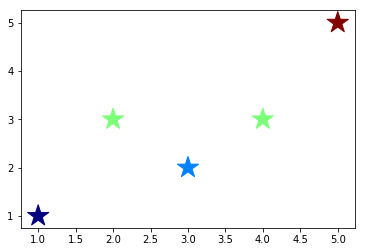

In [22]:
## FAÇA O PLOT DOS DADOS AQUI
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(x, y, c = y, s=500, marker="*", cmap="jet")

### 2.2 Calcular Covariância

A covariância de dois grupos de números descreve como esses números mudam juntos. A co-variância é uma generalização da correlação. A correlação descreve a relação entre dois grupos de números, enquanto a covariância pode descrever a relação entre dois ou mais grupos de números. Além disso, a covariância pode ser normalizada para produzir um valor de correlação. No entanto, podemos calcular a covariância entre duas variáveis da seguinte forma:

![alt text](images/covarianca.png "Covariancia")


Abaixo está uma função chamada *covariance()* que implementa esta estatística. Esta função baseia-se no passo anterior e leva as listas de valores x e y, bem como a média desses valores como argumentos.

In [23]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
  covar = 0.0
  for i in range(len(x)):
    covar += (x[i] - mean_x) * (y[i] - mean_y)
  return covar

### Exercicio 2

Teste o cálculo da covariância no mesmo pequeno conjunto de dados apresentado na
seção anterior.

In [36]:
## COLOQUE SEU CODIGO AQUI
covariance(x, mean_x, y, mean_y)

8.0

### 2.3 Estimativa dos Coeficientes 

Agora, devemos estimar os valores dos dois coeficientes em regressão linear simples. O primeiro é B1 que pode ser estimado como:

![alt text](images/B1.png "")

Podemos simplificar esta fórmula usando as funcões covariance e variance apresentadas acima, conforme a fórmula abaixo.

![alt text](images/B1_simplificado.png "")

Em seguida, precisamos estimar um valor para B0, também chamado de interceptação, pois controla o ponto inicial da linha onde ele intersecta o eixo y.

![alt text](images/B0.png "")

Mais uma vez, sabemos como estimar B1 e temos uma função para estimar a média (). Podemos juntar tudo isso em uma função denominada *coefficients ()* que leva o conjunto de dados como um argumento e retorna os coeficientes.


In [42]:
# Calculate coefficients
def coefficients(dataset):
      x = [row[0] for row in dataset]
      y = [row[1] for row in dataset]
      x_mean, y_mean = mean(x), mean(y)
      b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
      b0 = y_mean - b1 * x_mean
      return [b0, b1]

### Exercicio 3

Estenda o exercício anterior incluindo o cáculo dos coeficientes para os dados sintetizados.


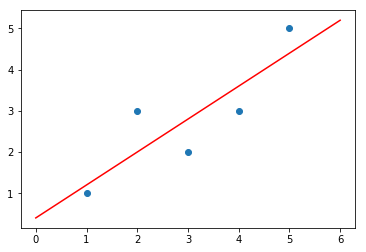

In [51]:
dataset = list(zip(x, y))
coeffs = coefficients(dataset)
f = lambda x: x*coeffs[1] + coeffs[0]

import numpy as np

xx = np.linspace(min(x) - 1, max(x) + 1, 100)
yy = f(xx)

plt.scatter(x, y)
plt.plot(xx, yy, c='r')

#### 2.2 Fazer previsões

O modelo de regressão linear simples é uma linha definida pelos coeficientes estimados a partir dos dados de treinamento. Uma vez que os coeficientes são estimados, podemos usá-los para fazer previsões. A equação para fazer previsões com um modelo de regressão linear simples é a seguinte:

![alt text](images/regressao_linear_modelo.png "")

Abaixo é apresentada a função chamada *simple_linear_regression ()* que implementa a equação de predição para fazer previsões em um conjunto de dados de teste. Também une a estimativa dos coeficientes nos dados de treinamento das etapas acima. Os coeficientes preparados a partir dos dados de treinamento são usados para fazer previsões nos dados do teste, que são retornados.

In [47]:
def simple_linear_regression(train, test):
  predictions = list()
  b0, b1 = coefficients(train)
  for row in test:
    ypred = b0 + b1 * row[0]
    predictions.append(ypred)
  return predictions

Para avaliar o modelo 
 adicionaremos uma função para gerenciar a avaliação das previsões denominadas *evaluate_algorithm ()* e outra função para estimar o erro quadrático médio da raiz das previsões denominadas métrica *rmse_metric ()*. Veja as funções abaixo:


In [49]:
from math import sqrt

# Calculate root mean squared error
def rmse_metric(actual, predicted):
  sum_error = 0.0
  for i in range(len(actual)):
    prediction_error = predicted[i] - actual[i]
    sum_error += (prediction_error ** 2)
  mean_error = sum_error / float(len(actual))
  return sqrt(mean_error)

# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
  test_set = list()
  for row in dataset:
    row_copy = list(row)
    row_copy[-1] = None
    test_set.append(row_copy)
  predicted = algorithm(dataset, test_set)
  print(predicted)
  actual = [row[-1] for row in dataset]
  rmse = rmse_metric(actual, predicted)
  return rmse

### Exercicio 4 

Agora junte tudo que foi criado para fazer previsões para o nosso conjunto de dados de teste.

In [52]:
evaluate_algorithm(dataset, simple_linear_regression)

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]


0.692820323027551

### Exercício 5

Crie um scatter plot para mostrar as previsões como uma linha e compará-lo com o conjunto de dados original.

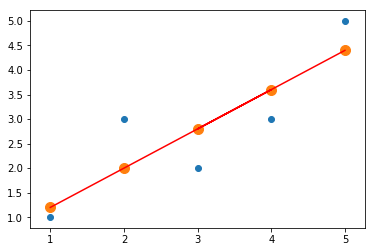

In [57]:
preds = simple_linear_regression(dataset, dataset)

plt.scatter(x, y)
plt.scatter(x, preds, s=100)
plt.plot(x, preds, c='r')